In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CarPred.csv')

In [3]:
df.head()

,make,transmission_type,seats_cop,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_patrol,seller_dealer,seller_self,year,km_driven,engine,max_power,model,selling_price
0,hyundai,0,0,0,1,0,0,1,0,0,0,1,2009,42945,2492,287,verna,210447.937555
1,toyota,0,0,0,1,0,0,0,0,1,1,0,2003,176401,3240,88,corolla,272870.715932
2,ford,1,0,0,0,0,0,0,0,1,1,1,2018,46852,3250,169,aspire,251387.190744
3,honda,1,0,0,0,0,1,0,0,0,1,1,2014,162580,1317,99,jazz,139196.325731
4,hyundai,1,0,0,1,0,1,0,0,0,1,1,2004,11264,3268,196,i10,227022.794299


In [4]:
df.shape

(20000, 18)

In [5]:
df.make.value_counts()

hyundai    3375
toyota     3375
suzuki     3359
maruti     3343
honda      3314
ford       3234
Name: make, dtype: int64

In [6]:
df.drop(['make','model'], axis= 1, inplace= True)

In [7]:
df.head()

,transmission_type,seats_cop,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_patrol,seller_dealer,seller_self,year,km_driven,engine,max_power,selling_price
0,0,0,0,1,0,0,1,0,0,0,1,2009,42945,2492,287,210447.937555
1,0,0,0,1,0,0,0,0,1,1,0,2003,176401,3240,88,272870.715932
2,1,0,0,0,0,0,0,0,1,1,1,2018,46852,3250,169,251387.190744
3,1,0,0,0,0,1,0,0,0,1,1,2014,162580,1317,99,139196.325731
4,1,0,0,1,0,1,0,0,0,1,1,2004,11264,3268,196,227022.794299


In [8]:
X = df[df.columns.drop('selling_price')]
Y = df['selling_price']

In [9]:
X.shape

(20000, 15)

In [10]:
X = X.to_numpy()
Y = Y.to_numpy()

In [11]:
u = np.mean(X, axis = 0)
std = np.std(X, axis = 0)

In [12]:
X = (X-u)/std

In [13]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

In [14]:
print(X.shape, Y.shape)

(20000, 16) (20000,)


In [15]:
def hypothesis(x, theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
      y_ += (theta[i]*x[i])
    return y_

In [16]:
def error(x, y, theta):
  e = 0.0
  m = X.shape[0]

  for i in range(m):
    y_ = hypothesis(X[i], theta)
    e += (y[i] - y_)**2

  return e/m

In [17]:
def gradient(X, y, theta):
  m, n = X.shape

  grad = np.zeros((n,))

  for j in range(n):
    for i in range(m):
      y_ = hypothesis(X[i], theta)
      grad[j] += (y_ - y[i])*X[i][j]


  return grad/m

In [18]:

def gradient_descent(X, y, learning_rate=0.1, max_epochs = 100):
  m, n = X.shape
  theta = np.zeros((n,))
  error_list = []

  for i in range(max_epochs):
    e = error(X, y, theta)
    error_list.append(e)

    # gradient descent
    grad = gradient(X, y, theta)
    for j in range(n):
      theta[j] = theta[j] - learning_rate*grad[j]


  return theta, error_list

In [19]:

import time
start = time.time()
theta, error_list = gradient_descent(X, Y)
end = time.time()
print("Time taken is: ", end-start)

Time taken is:  96.8368616104126


### Linear Regression model using scikit learn 

In [23]:
from sklearn.linear_model import LinearRegression

X = df[df.columns.drop("selling_price")]
Y = df["selling_price"]

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [27]:
cols = X.columns
X[cols] = sc.fit_transform(X[cols])

/tmp/ipykernel_206884/3279013895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols] = sc.fit_transform(X[cols])


In [28]:
X.head()

,transmission_type,seats_cop,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_patrol,seller_dealer,seller_self,year,km_driven,engine,max_power
0,-0.998501,-0.378224,-0.577889,0.9992,-0.178415,-0.260505,2.659140,-0.578967,-0.9992,-0.996705,1.011870,-0.238227,-0.989376,-0.438389,0.094652
1,-0.998501,-0.378224,-0.577889,0.9992,-0.178415,-0.260505,-0.376061,-0.578967,1.0008,1.003305,-0.988269,-1.182384,1.323182,0.208373,-1.438024
2,1.001501,-0.378224,-0.577889,-1.0008,-0.178415,-0.260505,-0.376061,-0.578967,1.0008,1.003305,1.011870,1.178009,-0.921675,0.217020,-0.814171
3,1.001501,-0.378224,-0.577889,-1.0008,-0.178415,3.838703,-0.376061,-0.578967,-0.9992,1.003305,1.011870,0.548571,1.083689,-1.454358,-1.353303
4,1.001501,-0.378224,-0.577889,0.9992,-0.178415,3.838703,-0.376061,-0.578967,-0.9992,1.003305,1.011870,-1.025024,-1.538352,0.232584,-0.606220


In [29]:
model = LinearRegression()

In [30]:
model.fit(X,Y)

LinearRegression()

In [31]:
model.intercept_

266271.8057707528

In [32]:
model.coef_

array([-6.83234746e+02,  1.52442100e+02,  1.45427665e+02,  6.77434690e+01,
        5.01795178e+02,  4.26800365e+01,  7.19523318e+01, -1.66045123e+02,
        5.82983773e+01,  5.09457373e+02, -1.03191098e+03,  6.79470723e+00,
        2.51905362e+02, -7.38843334e+01,  6.35028215e+04])

In [33]:
model.score(X,Y)

0.5729801349938517

In [34]:
print("Adjusted R-squared: ", 1 - (1-model.score(X,Y))*(len(Y) - 1)/(len(Y) - 1 - X.shape[1] - 1))

Adjusted R-squared:  0.5726382284813112


In [48]:
import statsmodels.api as sm

In [49]:
X_sm = sm.add_constant(X)

In [51]:
sm_model = sm.OLS(Y, X_sm).fit()

In [52]:

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     1788.
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        14:58:37   Log-Likelihood:            -2.4662e+05
No. Observations:               20000   AIC:                         4.933e+05
Df Residuals:                   19984   BIC:                         4.934e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.663e+05    387.92

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
vif = pd.DataFrame()

In [55]:
vif['features'] = X.columns

In [63]:
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [67]:
vif['VIF'] = round(vif['VIF'],2)

In [68]:
vif

,features,VIF
0,transmission_type,1.00
1,seats_cop,1.76
2,seats_family,2.26
3,seats_large,2.52
4,fuel_cng,1.93
5,fuel_diesel,2.86
6,fuel_electric,4.37
7,fuel_lpg,6.81
8,fuel_patrol,8.56
9,seller_dealer,1.00


In [ ]:
# Define the columns to keep, excluding those suspected of multicollinearity
cols2 = ["max_power", "transmission_type", "year", "km_driven", "fuel_electric", "seats_cop"]

In [77]:
X2 = X[cols2]

In [79]:
X2_sm = sm.add_constant(X2)

In [81]:
sm_model = sm.OLS(Y, X2_sm).fit()

In [82]:
print(sm_model.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7fb09d5873d0>>


In [87]:
vif = pd.DataFrame()
vif['features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)


In [88]:
vif

,features,VIF
0,max_power,1.0
1,transmission_type,1.0
2,year,1.0
3,km_driven,1.0
4,fuel_electric,1.0
5,seats_cop,1.0


In [89]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size = 0.1,random_state=1)

In [94]:
print("Training set shape X: ", X_train.shape)
print("Training set shape Y: ", y_train.shape)
print("Test set shape X: ", X_test.shape)
print("Test set shape Y: ", y_test.shape)

Training set shape X:  (18000, 6)
Training set shape Y:  (18000,)
Test set shape X:  (2000, 6)
Test set shape Y:  (2000,)


In [95]:
final_model = LinearRegression()

In [96]:
final_model.fit(X_train, y_train)

LinearRegression()

In [97]:
final_model.score(X_train , y_train)

0.5721401925646443

In [98]:
final_model.intercept_

266207.0902900053

In [99]:
final_model.coef_

array([ 6.35529402e+04, -6.31518829e+02,  2.44810594e+02,  1.24676617e+02,
       -1.36838783e+02, -4.51104629e+01])

In [100]:
y_pred = final_model.predict(X_test)

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [102]:
print("Mean absolute error: ", mean_absolute_error(y_pred, y_test))
print("Mean squared error: ", mean_squared_error(y_pred, y_test))
print("Root Mean squared error: ", np.sqrt(mean_squared_error(y_pred, y_test)))
print("Mean absolute percentage error: ", mean_absolute_percentage_error(y_pred, y_test))

Mean absolute error:  42831.81680048569
Mean squared error:  2889049562.0473557
Root Mean squared error:  53749.879646817404
Mean absolute percentage error:  0.1701119256512152


/tmp/ipykernel_206884/375460187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


<Axes: xlabel='selling_price', ylabel='Density'>

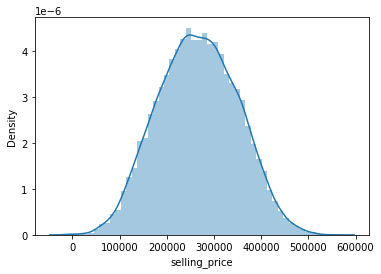

In [103]:
sns.distplot(y_train)

In [105]:
pred = final_model.predict(X_train)

In [106]:
errors = pred - y_train 

/tmp/ipykernel_206884/2392254718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: xlabel='selling_price', ylabel='Density'>

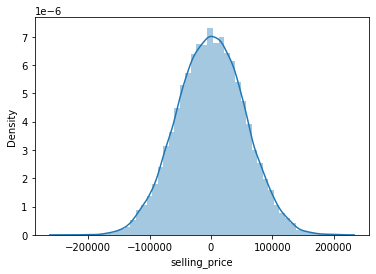

In [107]:
sns.distplot(errors)